## For DYAMOND data

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow.keras.models import load_model
from tensorflow import nn 

path_base = '/home/b/b309170/workspace_icon-ml/symbolic_regression/'

In [2]:
# To compute the variance for the R2-value
folder_data = '/home/b/b309170/my_work/icon-ml_data/cloud_cover_parameterization/neighborhood_based_SR_DYAMOND/'
output_data = np.load(os.path.join(folder_data, 'cloud_area_output_dyamond.npy'))

samples_total = len(output_data)

# Split into train/valid
training_folds = []
validation_folds = []
two_week_incr = samples_total//6

for i in range(3):
    # Note that this is a temporal split since time was the first dimension in the original tensor
    first_incr = np.arange(samples_total//6*i, samples_total//6*(i+1))
    second_incr = np.arange(samples_total//6*(i+3), samples_total//6*(i+4))

    validation_folds.append(np.append(first_incr, second_incr))
    training_folds.append(np.arange(samples_total))
    training_folds[i] = np.delete(training_folds[i], validation_folds[i])
    
output_valid = output_data[validation_folds[1]]
output_var = np.var(output_valid)
print(output_var)

1727.6115


In [3]:
# Dict to save all mse_scores
mse_scores_cl_vol = {}
mse_scores_cl_area = {}

# Dicts to save the number of parameters
no_parameters_cl_vol = {}
no_parameters_cl_area = {}

In [4]:
# Linear fits - MSEs
with open(os.path.join(path_base, 'baselines/linear_results_v2/dyamond_data/\
linear_function_fit_cl_volume_with_derivatives.txt'), 'r') as file:
    i = 2
    lines = file.readlines()
    for line in lines:
        if 'The bounded MSE on the validation data is' in line:
            mse_scores_cl_vol['lin_cl_vol_%d'%i] = float(line.split(' ')[-1])
            i += 1
    
with open(os.path.join(path_base, 'baselines/linear_results_v2/dyamond_data/\
linear_function_fit_cl_area_with_derivatives.txt'), 'r') as file:
    i = 1
    lines = file.readlines()
    for line in lines:
        if 'The bounded MSE on the validation data is' in line:
            mse_scores_cl_area['lin_cl_area_%d'%i] = float(line.split(' ')[-1])
            i += 1

In [5]:
# Linear models - Complexity
for key in mse_scores_cl_vol:
    no_parameters_cl_vol[key] = int(key.split('_')[-1]) + 1
    
for key in mse_scores_cl_area:
    no_parameters_cl_area[key] = int(key.split('_')[-1]) + 1

In [6]:
no_parameters_cl_area

{'lin_cl_area_1': 2,
 'lin_cl_area_2': 3,
 'lin_cl_area_3': 4,
 'lin_cl_area_4': 5,
 'lin_cl_area_5': 6,
 'lin_cl_area_6': 7,
 'lin_cl_area_7': 8,
 'lin_cl_area_8': 9,
 'lin_cl_area_9': 10,
 'lin_cl_area_10': 11,
 'lin_cl_area_11': 12,
 'lin_cl_area_12': 13,
 'lin_cl_area_13': 14,
 'lin_cl_area_14': 15,
 'lin_cl_area_15': 16,
 'lin_cl_area_16': 17,
 'lin_cl_area_17': 18,
 'lin_cl_area_18': 19,
 'lin_cl_area_19': 20,
 'lin_cl_area_20': 21,
 'lin_cl_area_21': 22,
 'lin_cl_area_22': 23,
 'lin_cl_area_23': 24}

In [7]:
# Polynomial fits - MSEs
# with open(os.path.join(path_base, 'baselines/polynomial_results_v2/dyamond_data\
# /normalized_data/without_regimes/polynomial_fit_cl_volume_with_derivatives_degree_2.json'), 'r') as file:
#     poly_deg_2_cl_volume = json.load(file)
#     i = 1
#     for key in poly_deg_2_cl_volume:
#         mse_scores_cl_vol['pol_deg_2_cl_vol_%d'%i] = np.round(poly_deg_2_cl_volume[key]['Bounded MSE on validation data'], 2)
#         i += 1
    
with open(os.path.join(path_base, 'baselines/polynomial_results_v2/dyamond_data\
/normalized_data/without_regimes/polynomial_fit_cl_area_with_derivatives_degree_2.json'), 'r') as file:
    poly_deg_2_cl_area = json.load(file)
    i = 1
    for key in poly_deg_2_cl_area:
        mse_scores_cl_area['pol_deg_2_cl_area_%d'%i] = np.round(poly_deg_2_cl_area[key]['Bounded MSE on validation data'], 2)
        i += 1
    
# with open(os.path.join(path_base, 'baselines/polynomial_results_v2/dyamond_data\
# /normalized_data/without_regimes/polynomial_fit_cl_volume_with_derivatives_degree_3.json'), 'r') as file:
#     poly_deg_3_cl_volume = json.load(file)
#     i = 1
#     for key in poly_deg_3_cl_volume:
#         mse_scores_cl_vol['pol_deg_3_cl_vol_%d'%i] = np.round(poly_deg_3_cl_volume[key]['Bounded MSE on validation data'], 2)
#         i += 1
    
with open(os.path.join(path_base, 'baselines/polynomial_results_v2/dyamond_data\
/normalized_data/without_regimes/polynomial_fit_cl_area_with_derivatives_degree_3.json'), 'r') as file:
    poly_deg_3_cl_area = json.load(file)
    i = 1
    for key in poly_deg_3_cl_area:
        mse_scores_cl_area['pol_deg_3_cl_area_%d'%i] = np.round(poly_deg_3_cl_area[key]['Bounded MSE on validation data'], 2)
        i += 1

In [8]:
# Polynomial fits - Complexity
for key in mse_scores_cl_vol:
    if 'pol' in key and 'cl_vol' in key:
        print(key)
        no_parameters_cl_vol[key] = int(key.split('_')[-1]) + 1
        
for key in mse_scores_cl_area:
    if 'pol' in key and 'cl_area' in key:
         no_parameters_cl_area[key] = int(key.split('_')[-1]) + 1

In [9]:
# With regimes (linear and polynomial fits)
with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/polynomial_results_v2/dyamond_data/normalized_data/data_driven_regimes/for_the_pareto_plot.json', 'r') as file:
    d = json.load(file)

for key in d['mses'].keys():
    mse_scores_cl_area[key] = np.round(d['mses'][key], 2)
    
for key in d['complexity'].keys():
    no_parameters_cl_area[key] = d['complexity'][key]

*Number of parameters*

In [10]:
# Count the number of parameters of the NNs here!
path_column_model = '/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/grid_column_based_DYAMOND/saved_models/'
path_cell_model = '/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/grid_cell_based_DYAMOND/saved_models/'
path_neighborhood_model = '/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_DYAMOND/saved_models/'
path_neighborhood_SR_model = '/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_SR_DYAMOND/saved_models/'

custom_objects = {}
custom_objects['leaky_relu'] = nn.leaky_relu

model_column_based = load_model(os.path.join(path_column_model, 'cross_validation_column_based_cl_area_fold_2_no_spinup.h5'))
model_cell_based = load_model(os.path.join(path_cell_model, 'cross_validation_cell_based_cl_area_fold_2_no_spinup.h5'), custom_objects)
model_neighborhood_based = load_model(os.path.join(path_neighborhood_model, 'cross_validation_neighborhood_cl_area_fold_2_no_spinup.h5'), custom_objects)
model_neighborhood_based_SR = load_model(os.path.join(path_neighborhood_SR_model, 'cross_validation_neighborhood_based_sr_cl_area_fold_2.h5'), custom_objects)

In [11]:
# 112411 parameters
model_column_based.summary()

Model: "column_based_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               39680     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 112,411
Trainable params: 112,411
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 9345 parameters
model_cell_based.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,345
Trainable params: 9,217
Non-trainable params: 128
____________________________________________________

In [13]:
# 10369 parameters
model_neighborhood_based.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,369
Trainable params: 10,241
Non-trainable params: 128
__________________________________________________

In [14]:
# 10241 parameters
model_neighborhood_based_SR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,113
Non-trainable params: 128
__________________________________________________

In [15]:
no_parameters_cl_vol['column_NN'] = 112411
no_parameters_cl_vol['cell_NN'] = 9345
no_parameters_cl_vol['neighborhood_NN'] = 10369
no_parameters_cl_vol['neighborhood_SR_NN'] = 10241

no_parameters_cl_area['column_NN'] = 112411
no_parameters_cl_area['cell_NN'] = 9345
no_parameters_cl_area['neighborhood_NN'] = 10369
no_parameters_cl_area['neighborhood_SR_NN'] = 10241

*MSEs (evaluate models on the second fold)*

In [16]:
## Four NNs

# Neighborhood SR model
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_SR_DYAMOND/saved_models/\
cross_validation_neighborhood_based_sr_cl_volume_fold_2.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_vol['neighborhood_SR_NN'] = float(line.split(' ')[-1])
            
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_SR_DYAMOND/saved_models/\
cross_validation_neighborhood_based_sr_cl_area_fold_2.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_area['neighborhood_SR_NN'] = float(line.split(' ')[-1])

# Cell-based model
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/grid_cell_based_DYAMOND/saved_models/\
cross_validation_cell_based_cl_volume_fold_2.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_vol['cell_NN'] = float(line.split(' ')[-1])
            
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/grid_cell_based_DYAMOND/saved_models/\
cross_validation_cell_based_cl_area_fold_2_no_spinup.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_area['cell_NN'] = float(line.split(' ')[-1])

# Neighborhood-based model
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_DYAMOND/saved_models/\
cross_validation_neighborhood_cl_volume_fold_2.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_vol['neighborhood_NN'] = float(line.split(' ')[-1])
            
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_DYAMOND/saved_models/\
cross_validation_neighborhood_cl_area_fold_2_no_spinup.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_area['neighborhood_NN'] = float(line.split(' ')[-1])
            
# Column-based model
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/grid_column_based_DYAMOND/saved_models/\
cross_validation_column_based_cl_volume_fold_2.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_vol['column_NN'] = float(line.split(' ')[-1])
            
with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/grid_column_based_DYAMOND/saved_models/\
cross_validation_column_based_cl_area_fold_2_no_spinup.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Bounded validation loss' in line:
            mse_scores_cl_area['column_NN'] = float(line.split(' ')[-1])

In [17]:
# Sundqvist model
no_parameters_cl_vol['sq_grid_search'] = 8
no_parameters_cl_area['sq_grid_search'] = 8

with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/sundqvist_tuning_dyamond/results_grid_search_cl_volume.json', 'r') as file:
    mse_scores_cl_vol['sq_grid_search'] = json.load(file)['Validation MSE']
    
with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/sundqvist_tuning_dyamond/results_grid_search_cl_area.json', 'r') as file:
    mse_scores_cl_area['sq_grid_search'] = json.load(file)['Validation MSE']
    
# Update (11/7/22): Sundqvist on regimes and with BFGS
no_parameters_cl_vol['sq_bfgs_regimes'] = 9
no_parameters_cl_area['sq_bfgs_regimes'] = 9
    
with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/sundqvist_tuning_dyamond/results_BFGS_tuned_cl_area.json', 'r') as file:
    mse_scores_cl_area['sq_bfgs_regimes'] = json.load(file)['MSE']

In [18]:
# Parameterization Wang
no_parameters_cl_vol['wang_grid_search'] = 2
no_parameters_cl_area['wang_grid_search'] = 2

with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/wang_tuning_dyamond/best_results.txt', 'r') as file:
    lines = file.readlines()
    for k in range(len(lines)):
        if 'cl_volume' in lines[k] and 'Validation score' in lines[k+3]:
            mse_scores_cl_vol['wang_grid_search'] = float(lines[k+4].split(',')[0].split(' ')[1])
        if 'cl_area' in lines[k] and 'Validation score' in lines[k+3]:
            mse_scores_cl_area['wang_grid_search'] = float(lines[k+4].split(',')[0].split(' ')[1])

In [19]:
# Parameterization Teixeira
no_parameters_cl_vol['teixeira_grid_search'] = 2
no_parameters_cl_area['teixeira_grid_search'] = 2

with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/teixeira_tuning_dyamond/best_results.txt', 'r') as file:
    lines = file.readlines()
    for k in range(len(lines)):
        if 'cl_volume' in lines[k] and 'Validation score' in lines[k+3]:
            mse_scores_cl_vol['teixeira_grid_search'] = float(lines[k+4].split(',')[0].split(' ')[1])
        if 'cl_area' in lines[k] and 'Validation score' in lines[k+3]:
            mse_scores_cl_area['teixeira_grid_search'] = float(lines[k+4].split(',')[0].split(' ')[1])

In [20]:
# NNs - Sequential feature selector
for no_features in range(1, 11):
    with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_on_seq_feat_sel_DYAMOND/\
saved_models/neighborhood_based_sfs_cl_volume_no_features_%d.txt'%no_features, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if 'Bounded validation loss' in line:
                mse_scores_cl_vol['seq_feat_sel_NN_%d'%no_features] = float(line.split(' ')[-1])

    with open('/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_on_seq_feat_sel_DYAMOND/\
saved_models/neighborhood_based_sfs_cl_area_no_features_%d.txt'%no_features, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if 'Bounded validation loss' in line:
                mse_scores_cl_area['seq_feat_sel_NN_%d'%no_features] = float(line.split(' ')[-1])
    
    # There are 8641 parameters in a neighborhood-based NN if we exclude the first layer (see model_neighborhood_based.summary())
    # In the first there are (no_features + 1)*64 parameters
    no_parameters_cl_vol['seq_feat_sel_NN_%d'%no_features] = 8641 + 64*(no_features + 1)
    no_parameters_cl_area['seq_feat_sel_NN_%d'%no_features] = 8641 + 64*(no_features + 1)
    
# Update (9/8/22): Actually, we performed some hyperparameter tuning on the SFS NNs with 4,5 and 6 features to 'stretch' the cl_area Pareto frontier
# See neighborhood_based_on_seq_feat_sel_DYAMOND/saved_models/hyperparameter_tests/read_results.ipynb and #236 for more information

for no_features in [4,5,6]:
    if no_features == 4:
        thrd_lay = 'False'
    else:
        thrd_lay = 'True'
    abspath = '/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_on_seq_feat_sel_DYAMOND/saved_models/hyperparameter_tests/neighborhood_based_sfs_cl_area_no_features_%d_False_%s_16.txt'%(no_features,thrd_lay)
    
    with open(abspath, 'r') as file:
            lines = file.readlines()
            for line in lines:
                if 'Bounded validation loss' in line:
                    mse_scores_cl_area['seq_feat_sel_NN_%d'%no_features] = float(line.split(' ')[-1])
    
    model = load_model(abspath[:-3]+'h5')
    print(model.summary())
    
# Update (10/27/22): We also update the NN with 7 features
no_features = 7
abspath = '/home/b/b309170/workspace_icon-ml/cloud_cover_parameterization/neighborhood_based_on_seq_feat_sel_DYAMOND/saved_models/hyperparameter_tests/neighborhood_based_sfs_cl_area_no_features_7_True_True_32.txt'

with open(abspath, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if 'Bounded validation loss' in line:
                mse_scores_cl_area['seq_feat_sel_NN_%d'%no_features] = float(line.split(' ')[-1])

model = load_model(abspath[:-3]+'h5')
print(model.summary())
    
# Taken from the model.summary() print out
no_parameters_cl_area['seq_feat_sel_NN_4'] = 369
no_parameters_cl_area['seq_feat_sel_NN_5'] = 657
no_parameters_cl_area['seq_feat_sel_NN_6'] = 673
no_parameters_cl_area['seq_feat_sel_NN_7'] = 2529

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (Non

In [21]:
# Derived symbolic expressions from PySR
with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/finding_symmetries/pysr_results_dyamond_on_regimes/no_of_regimes_2/optimized_eqns.json', 'r') as file:
    d = json.load(file)
    for eq_num in ['1', '2', '3', '4', '5', 'C']:
        mse_scores_cl_area['pysr_EQ%s'%eq_num] = d['EQ%s'%eq_num]['Valid MSE']
        # Plus one for the second regime
        no_parameters_cl_area['pysr_EQ%s'%eq_num] = d['EQ%s'%eq_num]['Complexity'] + 1

# Do we include eqns with no_regimes > 2? No, their MSE is not good enough.

In [22]:
# Derived symbolic expressions from GPGOMEA
with open('/home/b/b309170/workspace_icon-ml/symbolic_regression/finding_symmetries/gpgomea_results/optimized_eqns.json', 'r') as file:
    d = json.load(file)
    for key in d.keys():
        mse_scores_cl_area['gpgomea ' + key] = d[key]['Valid MSE']
        no_parameters_cl_area['gpgomea ' + key] = d[key]['Number of parameters (for reg 1)'] + 1

What N shall we choose s.t. the line of constant AIC will be visible in our plot?

$AIC = N \cdot log(MSE) + 2 \cdot K$

With constant AIC: <br>
$N \cdot log(MSE_0) + 2K_0 = N \cdot log(MSE_1) + 2K_1$ <br>
$N = \frac{2 (K_1 - K_0)}{log(MSE_0/MSE_1)} = \frac{2 (K_{max} - K_{min})}{log(MSE_{max}/MSE_{min})}$

And: $K = (AIC - N \cdot log(MSE))/2$

$\Rightarrow$ We draw the Pareto frontier instead of using the AIC/BIC! <br>
$\Rightarrow$ Downside about AIC/BIC is that when $N$ is large, then $K$ is not important

In [23]:
# # Constructing N and aic such that it fits into our plot
# mse_min = np.min([mse_scores_cl_vol[key] for key in mse_scores_cl_vol.keys()])
# mse_max = np.max([mse_scores_cl_vol[key] for key in mse_scores_cl_vol.keys()])
# K_min = np.min([no_parameters_cl_vol[key] for key in mse_scores_cl_vol.keys()])
# K_max = np.max([no_parameters_cl_vol[key] for key in mse_scores_cl_vol.keys()])

# N = (2*(K_max - K_min))/(np.log(mse_max/mse_min))

# assert np.abs(N*np.log(mse_min) + 2*K_max - (N*np.log(mse_max) + 2*K_min)) < 1e-5

# aic = N*np.log(mse_min) + 2*K_max

# print(N)

In [24]:
# Construct a Pareto frontier
pareto_mse_cl_vol = []
pareto_par_cl_vol = []

# Convert to a list
mse_scores_cl_vol_list = []
no_parameters_cl_vol_list = []
for key in mse_scores_cl_vol.keys():
    mse_scores_cl_vol_list.append(mse_scores_cl_vol[key])
    no_parameters_cl_vol_list.append(no_parameters_cl_vol[key])

# From best to worst
indices = np.argsort(mse_scores_cl_vol_list)

k = 0
pareto_mse_cl_vol.append(mse_scores_cl_vol_list[indices[k]])
pareto_par_cl_vol.append(no_parameters_cl_vol_list[indices[k]])

for i in range(1, len(indices)):
    if no_parameters_cl_vol_list[indices[i]] < no_parameters_cl_vol_list[indices[k]]:
        pareto_mse_cl_vol.append(mse_scores_cl_vol_list[indices[i]])
        pareto_par_cl_vol.append(no_parameters_cl_vol_list[indices[i]])
        k = i

In [25]:
# Construct a Pareto frontier
pareto_mse_cl_area = []
pareto_par_cl_area = []

# Convert to a list
mse_scores_cl_area_list = []
no_parameters_cl_area_list = []
for key in mse_scores_cl_area.keys():
    mse_scores_cl_area_list.append(mse_scores_cl_area[key])
    no_parameters_cl_area_list.append(no_parameters_cl_area[key])

# From best to worst
indices = np.argsort(mse_scores_cl_area_list)

k = 0
pareto_mse_cl_area.append(mse_scores_cl_area_list[indices[k]])
pareto_par_cl_area.append(no_parameters_cl_area_list[indices[k]])

for i in range(1, len(indices)):
    if no_parameters_cl_area_list[indices[i]] < no_parameters_cl_area_list[indices[k]]:
        pareto_mse_cl_area.append(mse_scores_cl_area_list[indices[i]])
        pareto_par_cl_area.append(no_parameters_cl_area_list[indices[i]])
        k = i

In [26]:
# Increase the general font size
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['axes.labelsize'] = 'x-large' # For an axes xlabel and ylabel
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'xx-large'

Text(190, 2, 'Xu-Randall')

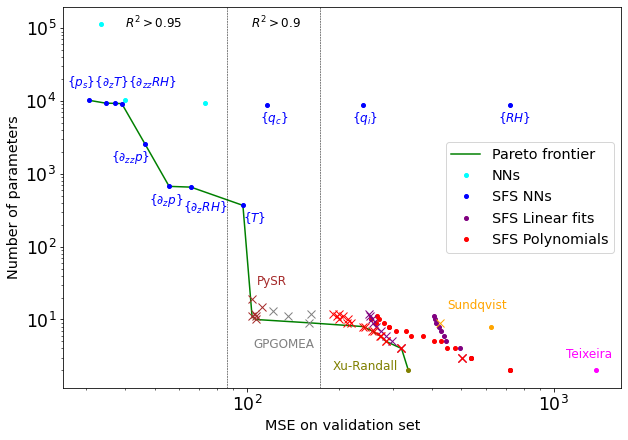

In [27]:
fig = plt.figure(figsize=(10,7))

# ## First plot
# ax = fig.add_subplot(121, title='cl_vol', xlabel='MSE on validation set', ylabel='Number of parameters')

# # # Plot line of constant AIC
# # handleAIC, = ax.plot(np.linspace(mse_min, mse_max, 1000), (aic - N*np.log(np.linspace(mse_min, mse_max, 1000)))/2, color='green', \
# #                    label='AIC = %d'%aic)

# # Plot Pareto frontier
# handlePAR, = ax.plot(pareto_mse_cl_vol, pareto_par_cl_vol, color='green', label='Pareto frontier')

# for key in no_parameters_cl_vol.keys():
#     if 'NN' in key and 'seq' not in key:
#         handleA, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='blue', label='NNs')
#     elif 'NN' in key and 'seq' in key:
#         try:
#             handleE, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='cyan', label='SFS NNs')
#         except:
#             pass
#     elif 'lin' in key:
#         handleB, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='purple', label='SFS Linear fits')
#     elif 'pol' in key:
#         handleC, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='red', label='SFS Polynomials')
#     elif 'sq' in key:
#         handleD, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='orange', label='Sundqvist')
#     elif 'wang' in key:
#         handleF, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='green', label='Wang')
#     elif 'teixeira' in key:
#         handleG, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='magenta', label='Teixeira')
        
# # ax.legend(handles=[handleA, handleB, handleC, handleD])
# ax.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleD, handleF, handleG])
# ax.set_xscale('log')
# ax.set_yscale('log')

# # R2 = 0.9
# ax.axvline(x = 188.57, linewidth = 0.5, linestyle='--')

plt.rc('font', size=10)

## Second plot
# ax_2 = fig.add_subplot(122, title='cl_area', xlabel='MSE on validation set')
# ax_2 = fig.add_subplot(111, title='Performance vs complexity: Cloud area fraction schemes', xlabel='MSE on validation set', ylabel='Number of parameters')
ax_2 = fig.add_subplot(111, xlabel='MSE on validation set', ylabel='Number of parameters')

# Plot Pareto frontier
handlePAR, = ax_2.plot(pareto_mse_cl_area, pareto_par_cl_area, color='green', label='Pareto frontier')
    
ms = 8    

for key in no_parameters_cl_area.keys():
    if 'NN' in key and 'seq' not in key and 'SR' not in key:
        handleA, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='cyan', label='NNs', ms=ms)
    # elif 'NN' in key and 'SR' in key:
    #     handleN, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='dodgerblue', label='SR NN')
    elif 'NN' in key and ('seq' in key or 'SR' in key):
        handleE, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='blue', label='SFS NNs', ms=ms)
    elif 'lin' in key and int(key.split('_')[-1]) < 11:
        handleB, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='purple', label='SFS Linear fits', ms=ms)
    elif 'pol' in key and int(key.split('_')[-1]) < 11:
        handleC, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='red', label='SFS Polynomials', ms=ms)
    elif 'wang' in key:
        handleF, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='olive', label='Xu-Randall', ms=ms)
    elif 'teixeira' in key:
        handleG, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='magenta', label='Teixeira', ms=ms)
    elif 'sq_grid' in key:
        handleD, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='orange', label='Sundqvist', ms=ms)
    elif 'sq_bfgs' in key:
        handleM, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='orange', label='Sundqvist, PC$_2$ enforced', ms=ms)
    elif 'deg_1' in key and 'no_reg_2' in key:
        handleH, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='purple', label='SFS Linear fits, PC$_2$ enforced', ms=ms)
    # elif 'deg_1' in key and ('no_reg_3' in key or 'no_reg_4' in key):
    #     handleI, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='purple', label='SFS Linear fits, 3 or 4 regimes')
    elif (not 'deg_1' in key) and 'no_reg_2' in key:
        handleJ, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='red', label='SFS Polynomials, PC$_2$ enforced', ms=ms)
    # elif (not 'deg_1' in key) and ('no_reg_3' in key or 'no_reg_4' in key):
    #     handleK, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='red', label='SFS Polynomials, 3 or 4 regimes')
    elif 'pysr' in key:
        handleL, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='brown', label='PySR fits, PC$_2$ enforced', ms=ms)
    elif 'gpgomea' in key:
        handleO, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='gray', label='GPGOMEA fits, PC$_2$ enforced', ms=ms)

ax_2.set_xscale('log')
ax_2.set_yscale('log')
# ax.legend(handles=[handleA, handleB, handleC, handleD])
# ax_2.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleF, handleG, handleD, handleM, handleH, handleJ, handleL, handleO])
ax_2.legend(handles=[handlePAR, handleA, handleE, handleB, handleC])

# R2 = 0.9 = 0.1*np.var(output_data)
ax_2.axvline(x = 0.1*output_var, linewidth = 0.5, linestyle='--', color='black')
# R2 = 0.99 = 0.01*np.var(output_data)
ax_2.axvline(x = 0.05*output_var, linewidth = 0.5, linestyle='--', color='black')
# # R2 = 0.99 = 0.01*np.var(output_data)
# ax_2.axvline(x = 0.01*output_var, linewidth = 0.5, linestyle='--')

plt.rc('font', size=12)
plt.text(103, 10**5, r'$R^2 > 0.9$', color='black')
plt.text(40, 10**5, r'$R^2 > 0.95$', color='black')

plt.text(660, 5200, r'$\{RH\}$', color='blue')
plt.text(220, 5200, r'$\{q_i\}$', color='blue')
plt.text(110, 5200, r'$\{q_c\}$', color='blue')
plt.text(97, 220, r'$\{T\}$', color='blue')
plt.text(62, 300, r'$\{\partial_z RH\}$', color='blue')
plt.text(48, 380, r'$\{\partial_z p\}$', color='blue')
plt.text(36, 1500, r'$\{\partial_{zz} p\}$', color='blue')
plt.text(26, 16000, r'$\{p_s\} \{\partial_z T\} \{\partial_{zz} RH\}$', color='blue')

plt.text(105, 4, 'GPGOMEA', color='gray')
plt.text(450, 14, 'Sundqvist', color='orange')
plt.text(1100, 3, 'Teixeira', color='magenta')
plt.text(108, 30, 'PySR', color='brown')
plt.text(190, 2, 'Xu-Randall', color='olive')

# IC = 100

# # L2-norm
# n = 1
# a = 1/10
# x_IC = np.arange(30,10**3,1)
# y_IC = (np.abs(IC**n) - np.abs(x_IC**n))**(1/n)/a
# plt.plot(x_IC, y_IC)

# plt.savefig('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/combined_results/dyamond_data/performance_vs_complexity_logscale_pysr_fixed.pdf')

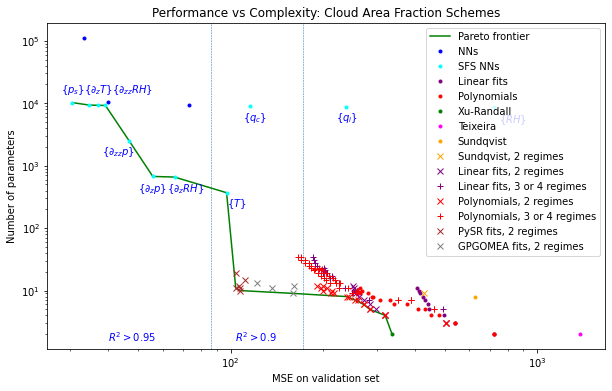

In [33]:
fig = plt.figure(figsize=(10,6))

# ## First plot
# ax = fig.add_subplot(121, title='cl_vol', xlabel='MSE on validation set', ylabel='Number of parameters')

# # # Plot line of constant AIC
# # handleAIC, = ax.plot(np.linspace(mse_min, mse_max, 1000), (aic - N*np.log(np.linspace(mse_min, mse_max, 1000)))/2, color='green', \
# #                    label='AIC = %d'%aic)

# # Plot Pareto frontier
# handlePAR, = ax.plot(pareto_mse_cl_vol, pareto_par_cl_vol, color='green', label='Pareto frontier')

# for key in no_parameters_cl_vol.keys():
#     if 'NN' in key and 'seq' not in key:
#         handleA, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='blue', label='NNs')
#     elif 'NN' in key and 'seq' in key:
#         try:
#             handleE, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='cyan', label='SFS NNs')
#         except:
#             pass
#     elif 'lin' in key:
#         handleB, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='purple', label='SFS Linear fits')
#     elif 'pol' in key:
#         handleC, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='red', label='SFS Polynomials')
#     elif 'sq' in key:
#         handleD, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='orange', label='Sundqvist')
#     elif 'wang' in key:
#         handleF, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='green', label='Wang')
#     elif 'teixeira' in key:
#         handleG, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='magenta', label='Teixeira')
        
# # ax.legend(handles=[handleA, handleB, handleC, handleD])
# ax.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleD, handleF, handleG])
# ax.set_xscale('log')
# ax.set_yscale('log')

# # R2 = 0.9
# ax.axvline(x = 188.57, linewidth = 0.5, linestyle='--')

## Second plot
# ax_2 = fig.add_subplot(122, title='cl_area', xlabel='MSE on validation set')
ax_2 = fig.add_subplot(111, title='Performance vs Complexity: Cloud Area Fraction Schemes', xlabel='MSE on validation set', ylabel='Number of parameters')

# Plot Pareto frontier
handlePAR, = ax_2.plot(pareto_mse_cl_area, pareto_par_cl_area, color='green', label='Pareto frontier')
    
for key in no_parameters_cl_area.keys():
    if 'NN' in key and 'seq' not in key and 'SR' not in key:
        handleA, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='blue', label='NNs')
    # elif 'NN' in key and 'SR' in key:
    #     handleN, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='dodgerblue', label='SR NN')
    elif 'NN' in key and ('seq' in key or 'SR' in key):
        handleE, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='cyan', label='SFS NNs')
    elif 'lin' in key and int(key.split('_')[-1]) < 11:
        handleB, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='purple', label='SFS Linear fits')
    elif 'pol' in key and int(key.split('_')[-1]) < 11:
        handleC, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='red', label='SFS Polynomials')
    elif 'wang' in key:
        handleF, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='green', label='Xu-Randall')
    elif 'teixeira' in key:
        handleG, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='magenta', label='Teixeira')
    elif 'sq_grid' in key:
        handleD, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='orange', label='Sundqvist')
    elif 'sq_bfgs' in key:
        handleM, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='orange', label='Sundqvist, 2 regimes')
    elif 'deg_1' in key and 'no_reg_2' in key:
        handleH, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='purple', label='SFS Linear fits, 2 regimes')
    elif 'deg_1' in key and ('no_reg_3' in key or 'no_reg_4' in key):
        handleI, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='purple', label='SFS Linear fits, 3 or 4 regimes')
    elif (not 'deg_1' in key) and 'no_reg_2' in key:
        handleJ, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='red', label='SFS Polynomials, 2 regimes')
    elif (not 'deg_1' in key) and ('no_reg_3' in key or 'no_reg_4' in key):
        handleK, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='red', label='SFS Polynomials, 3 or 4 regimes')
    elif 'pysr' in key:
        handleL, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='brown', label='PySR fits, 2 regimes')
    elif 'gpgomea' in key:
        handleO, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='gray', label='GPGOMEA fits, 2 regimes')

ax_2.set_xscale('log')
ax_2.set_yscale('log')
# ax.legend(handles=[handleA, handleB, handleC, handleD])
ax_2.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleF, handleG, handleD, handleM, handleH, handleI, handleJ, handleK, handleL, handleO])

# R2 = 0.9 = 0.1*np.var(output_data)
ax_2.axvline(x = 0.1*output_var, linewidth = 0.5, linestyle='--')
# R2 = 0.99 = 0.01*np.var(output_data)
ax_2.axvline(x = 0.05*output_var, linewidth = 0.5, linestyle='--')
# # R2 = 0.99 = 0.01*np.var(output_data)
# ax_2.axvline(x = 0.01*output_var, linewidth = 0.5, linestyle='--')
plt.text(103, 1.5, r'$R^2 > 0.9$', color='blue')
plt.text(40, 1.5, r'$R^2 > 0.95$', color='blue')

plt.text(750, 4800, r'$\{RH\}$', color='blue')
plt.text(220, 5200, r'$\{q_i\}$', color='blue')
plt.text(110, 5200, r'$\{q_c\}$', color='blue')
plt.text(97, 220, r'$\{T\}$', color='blue')
plt.text(62, 380, r'$\{\partial_z RH\}$', color='blue')
plt.text(50, 380, r'$\{\partial_z p\}$', color='blue')
plt.text(38, 1500, r'$\{\partial_{zz} p\}$', color='blue')
plt.text(28, 15000, r'$\{p_s\} \{\partial_z T\} \{\partial_{zz} RH\}$', color='blue')

# plt.savefig('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/combined_results/dyamond_data/performance_vs_complexity_logscale_all_polynomials.pdf')

In [28]:
# Some MSEs
print(mse_scores_cl_area['deg_1_no_reg_2_no_var_1'])
print(mse_scores_cl_area['deg_1_no_reg_2_no_var_10'])

print(mse_scores_cl_area['deg_3_no_reg_2_no_var_1'])
print(mse_scores_cl_area['deg_3_no_reg_2_no_var_10'])

502.74
250.43
502.74
190.78


In [29]:
# Some R2 scores
print(1 - mse_scores_cl_area['pysr_EQ4']/output_var)
print(1 - mse_scores_cl_area['pysr_EQ5']/output_var)

print(1 - mse_scores_cl_area['seq_feat_sel_NN_3']/output_var)
print(1 - mse_scores_cl_area['seq_feat_sel_NN_4']/output_var)
print(1 - mse_scores_cl_area['seq_feat_sel_NN_5']/output_var)

0.9398320646996248
0.9353079294724045
0.9328270254362575
0.9438253896794743
0.9619651745231421


In [36]:
s = []
for key in mse_scores_cl_area.keys():
    s.append(np.sqrt(mse_scores_cl_area[key]**2 + no_parameters_cl_area[key]**2))
    
order = np.argsort(s)
np.array(list(mse_scores_cl_area.keys()))[order]

array(['pysr_EQ4', 'pysr_EQC', 'pysr_EQ3', 'pysr_EQ1', 'pysr_EQ2',
       'pysr_EQ5', 'gpgomea Equation 1', 'gpgomea Equation 2',
       'gpgomea Equation 3', 'gpgomea Equation 4',
       'deg_3_no_reg_4_no_var_10', 'deg_3_no_reg_4_no_var_9',
       'deg_2_no_reg_4_no_var_10', 'deg_3_no_reg_4_no_var_8',
       'deg_2_no_reg_4_no_var_9', 'deg_3_no_reg_4_no_var_7',
       'deg_2_no_reg_4_no_var_8', 'deg_2_no_reg_3_no_var_10',
       'deg_2_no_reg_4_no_var_7', 'deg_1_no_reg_4_no_var_10',
       'deg_2_no_reg_3_no_var_9', 'deg_2_no_reg_4_no_var_6',
       'deg_1_no_reg_4_no_var_9', 'deg_1_no_reg_4_no_var_8',
       'deg_3_no_reg_2_no_var_10', 'deg_1_no_reg_4_no_var_7',
       'deg_2_no_reg_4_no_var_5', 'deg_2_no_reg_3_no_var_8',
       'deg_3_no_reg_3_no_var_10', 'deg_1_no_reg_4_no_var_6',
       'deg_3_no_reg_2_no_var_9', 'deg_2_no_reg_3_no_var_7',
       'deg_3_no_reg_3_no_var_9', 'deg_3_no_reg_2_no_var_8',
       'deg_3_no_reg_4_no_var_6', 'deg_2_no_reg_2_no_var_10',
       'deg_1_no_re

In [35]:
s = []
for key in mse_scores_cl_area.keys():
    s.append(np.sqrt(np.log(mse_scores_cl_area[key])**2 + np.log(no_parameters_cl_area[key])**2))
    
order = np.argsort(s)
np.array(list(mse_scores_cl_area.keys()))[order]

array(['pysr_EQ1', 'pysr_EQ4', 'pysr_EQ2', 'pysr_EQ3', 'pysr_EQ5',
       'gpgomea Equation 1', 'gpgomea Equation 2', 'pysr_EQC',
       'gpgomea Equation 3', 'gpgomea Equation 4',
       'deg_3_no_reg_2_no_var_8', 'deg_3_no_reg_2_no_var_7',
       'deg_3_no_reg_2_no_var_9', 'deg_3_no_reg_2_no_var_10',
       'deg_2_no_reg_2_no_var_7', 'deg_2_no_reg_2_no_var_8',
       'deg_2_no_reg_2_no_var_9', 'deg_2_no_reg_2_no_var_10',
       'deg_3_no_reg_2_no_var_6', 'wang_grid_search',
       'deg_2_no_reg_2_no_var_6', 'deg_3_no_reg_2_no_var_5',
       'deg_3_no_reg_2_no_var_3', 'deg_2_no_reg_2_no_var_3',
       'deg_2_no_reg_2_no_var_4', 'deg_3_no_reg_2_no_var_4',
       'deg_2_no_reg_2_no_var_5', 'deg_1_no_reg_2_no_var_3',
       'deg_2_no_reg_3_no_var_4', 'deg_1_no_reg_2_no_var_4',
       'deg_3_no_reg_2_no_var_2', 'deg_1_no_reg_2_no_var_2',
       'deg_2_no_reg_2_no_var_2', 'deg_2_no_reg_3_no_var_5',
       'deg_1_no_reg_2_no_var_5', 'deg_1_no_reg_3_no_var_3',
       'deg_1_no_reg_2_no_var_6

In [31]:
no_parameters_cl_area

{'lin_cl_area_1': 2,
 'lin_cl_area_2': 3,
 'lin_cl_area_3': 4,
 'lin_cl_area_4': 5,
 'lin_cl_area_5': 6,
 'lin_cl_area_6': 7,
 'lin_cl_area_7': 8,
 'lin_cl_area_8': 9,
 'lin_cl_area_9': 10,
 'lin_cl_area_10': 11,
 'lin_cl_area_11': 12,
 'lin_cl_area_12': 13,
 'lin_cl_area_13': 14,
 'lin_cl_area_14': 15,
 'lin_cl_area_15': 16,
 'lin_cl_area_16': 17,
 'lin_cl_area_17': 18,
 'lin_cl_area_18': 19,
 'lin_cl_area_19': 20,
 'lin_cl_area_20': 21,
 'lin_cl_area_21': 22,
 'lin_cl_area_22': 23,
 'lin_cl_area_23': 24,
 'pol_deg_2_cl_area_1': 2,
 'pol_deg_2_cl_area_2': 3,
 'pol_deg_2_cl_area_3': 4,
 'pol_deg_2_cl_area_4': 5,
 'pol_deg_2_cl_area_5': 6,
 'pol_deg_2_cl_area_6': 7,
 'pol_deg_2_cl_area_7': 8,
 'pol_deg_2_cl_area_8': 9,
 'pol_deg_2_cl_area_9': 10,
 'pol_deg_2_cl_area_10': 11,
 'pol_deg_2_cl_area_11': 12,
 'pol_deg_2_cl_area_12': 13,
 'pol_deg_2_cl_area_13': 14,
 'pol_deg_2_cl_area_14': 15,
 'pol_deg_2_cl_area_15': 16,
 'pol_deg_2_cl_area_16': 17,
 'pol_deg_2_cl_area_17': 18,
 'pol_deg_2_

In [27]:
cl_area_results = {}
cl_area_results['Complexity/Number of parameters'] = no_parameters_cl_area
cl_area_results['MSE scores on validation set'] = mse_scores_cl_area

with open('./combined_results/dyamond_data/cl_area_pareto_frontier.json', 'w') as file:
    json.dump(cl_area_results, file)

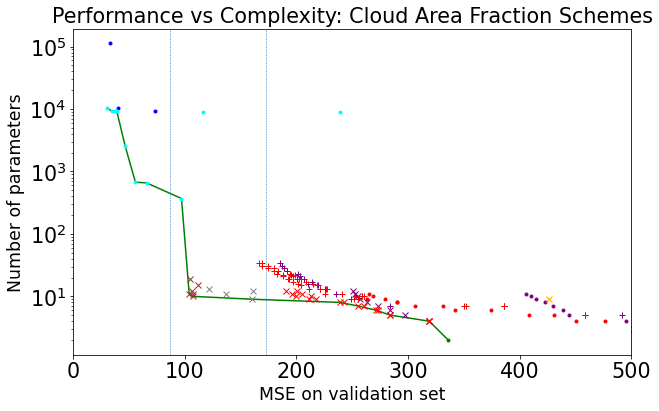

In [44]:
fig = plt.figure(figsize=(10,6))

# ## First plot
# ax = fig.add_subplot(121, title='cl_vol', xlabel='MSE on validation set', ylabel='Number of parameters')

# # # Plot line of constant AIC
# # handleAIC, = ax.plot(np.linspace(mse_min, mse_max, 1000), (aic - N*np.log(np.linspace(mse_min, mse_max, 1000)))/2, color='green', \
# #                    label='AIC = %d'%aic)

# # Plot Pareto frontier
# handlePAR, = ax.plot(pareto_mse_cl_vol, pareto_par_cl_vol, color='green', label='Pareto frontier')

# for key in no_parameters_cl_vol.keys():
#     if 'NN' in key and 'seq' not in key:
#         handleA, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='blue', label='NNs')
#     elif 'NN' in key and 'seq' in key:
#         try:
#             handleE, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='cyan', label='SFS NNs')
#         except:
#             pass
#     elif 'lin' in key:
#         handleB, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='purple', label='SFS Linear fits')
#     elif 'pol' in key:
#         handleC, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='red', label='SFS Polynomials')
#     elif 'sq' in key:
#         handleD, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='orange', label='Sundqvist')
#     elif 'wang' in key:
#         handleF, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='green', label='Wang')
#     elif 'teixeira' in key:
#         handleG, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='magenta', label='Teixeira')
        
# # ax.legend(handles=[handleA, handleB, handleC, handleD])
# ax.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleD, handleF, handleG])
# ax.set_xscale('log')
# ax.set_yscale('log')

# # R2 = 0.9
# ax.axvline(x = 188.57, linewidth = 0.5, linestyle='--')

## Second plot
# ax_2 = fig.add_subplot(122, title='cl_area', xlabel='MSE on validation set')
ax_2 = fig.add_subplot(111, title='Performance vs Complexity: Cloud Area Fraction Schemes', xlabel='MSE on validation set', ylabel='Number of parameters')

# Plot Pareto frontier
handlePAR, = ax_2.plot(pareto_mse_cl_area, pareto_par_cl_area, color='green', label='Pareto frontier')
    
for key in no_parameters_cl_area.keys():
    if 'NN' in key and 'seq' not in key and 'SR' not in key:
        handleA, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='blue', label='NNs')
    # elif 'NN' in key and 'SR' in key:
    #     handleN, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='dodgerblue', label='SR NN')
    elif 'NN' in key and ('seq' in key or 'SR' in key):
        handleE, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='cyan', label='SFS NNs')
    elif 'lin' in key and int(key.split('_')[-1]) < 11:
        handleB, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='purple', label='SFS Linear fits')
    elif 'pol' in key and int(key.split('_')[-1]) < 11:
        handleC, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='red', label='SFS Polynomials')
    elif 'wang' in key:
        handleF, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='green', label='Xu-Randall')
    elif 'teixeira' in key:
        handleG, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='magenta', label='Teixeira')
    elif 'sq_grid' in key:
        handleD, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='orange', label='Sundqvist')
    elif 'sq_bfgs' in key:
        handleM, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='orange', label='Sundqvist, 2 regimes')
    elif 'deg_1' in key and 'no_reg_2' in key:
        handleH, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='purple', label='SFS Linear fits, 2 regimes')
    elif 'deg_1' in key and ('no_reg_3' in key or 'no_reg_4' in key):
        handleI, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='purple', label='SFS Linear fits, 3 or 4 regimes')
    elif (not 'deg_1' in key) and 'no_reg_2' in key:
        handleJ, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='red', label='SFS Polynomials, 2 regimes')
    elif (not 'deg_1' in key) and ('no_reg_3' in key or 'no_reg_4' in key):
        handleK, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='red', label='SFS Polynomials, 3 or 4 regimes')
    elif 'pysr' in key:
        handleL, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='brown', label='PySR fits, 2 regimes')
    elif 'gpgomea' in key:
        handleO, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='gray', label='GPGOMEA fits, 2 regimes')

# ax_2.set_xscale('log')
# ax_2.set_yscale('log')
# ax.legend(handles=[handleA, handleB, handleC, handleD])
# ax_2.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleF, handleG, handleD, handleM, handleH, handleI, handleJ, handleK, handleL, handleO])

# R2 = 0.9 = 0.1*np.var(output_data)
ax_2.axvline(x = 0.1*output_var, linewidth = 0.5, linestyle='--')
# R2 = 0.99 = 0.01*np.var(output_data)
ax_2.axvline(x = 0.05*output_var, linewidth = 0.5, linestyle='--')
# # R2 = 0.99 = 0.01*np.var(output_data)
# # ax_2.axvline(x = 0.01*output_var, linewidth = 0.5, linestyle='--')
# plt.text(103, 1.5, r'$R^2 > 0.9$', color='blue')
# plt.text(40, 1.5, r'$R^2 > 0.95$', color='blue')

# plt.text(750, 4800, r'$\{RH\}$', color='blue')
# plt.text(220, 5200, r'$\{q_i\}$', color='blue')
# plt.text(110, 5200, r'$\{q_c\}$', color='blue')
# plt.text(97, 220, r'$\{T\}$', color='blue')
# plt.text(62, 380, r'$\{\partial_z RH\}$', color='blue')
# plt.text(50, 380, r'$\{\partial_z p\}$', color='blue')
# plt.text(38, 1500, r'$\{\partial_{zz} p\}$', color='blue')
# plt.text(28, 15000, r'$\{p_s\} \{\partial_z T\} \{\partial_{zz} RH\}$', color='blue')
# plt.ylim([0,500])
plt.xlim([0,500])
plt.yscale('log')

# plt.savefig('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/combined_results/dyamond_data/performance_vs_complexity_logscale_all_polynomials.pdf')

**Plot only the regimes**

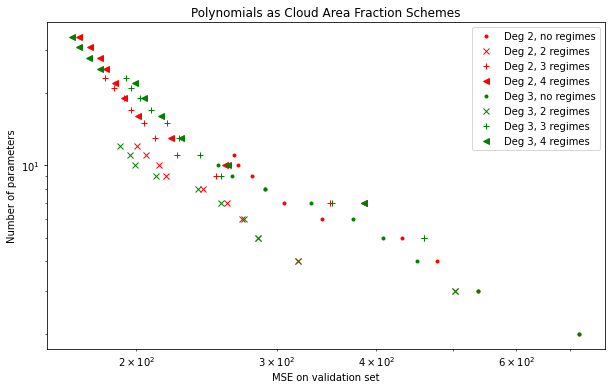

In [62]:
fig = plt.figure(figsize=(10,6))

# ## First plot
# ax = fig.add_subplot(121, title='cl_vol', xlabel='MSE on validation set', ylabel='Number of parameters')

# # # Plot line of constant AIC
# # handleAIC, = ax.plot(np.linspace(mse_min, mse_max, 1000), (aic - N*np.log(np.linspace(mse_min, mse_max, 1000)))/2, color='green', \
# #                    label='AIC = %d'%aic)

# # Plot Pareto frontier
# handlePAR, = ax.plot(pareto_mse_cl_vol, pareto_par_cl_vol, color='green', label='Pareto frontier')

# for key in no_parameters_cl_vol.keys():
#     if 'NN' in key and 'seq' not in key:
#         handleA, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='blue', label='NNs')
#     elif 'NN' in key and 'seq' in key:
#         try:
#             handleE, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='cyan', label='SFS NNs')
#         except:
#             pass
#     elif 'lin' in key:
#         handleB, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='purple', label='SFS Linear fits')
#     elif 'pol' in key:
#         handleC, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='red', label='SFS Polynomials')
#     elif 'sq' in key:
#         handleD, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='orange', label='Sundqvist')
#     elif 'wang' in key:
#         handleF, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='green', label='Wang')
#     elif 'teixeira' in key:
#         handleG, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='magenta', label='Teixeira')
        
# # ax.legend(handles=[handleA, handleB, handleC, handleD])
# ax.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleD, handleF, handleG])
# ax.set_xscale('log')
# ax.set_yscale('log')

# # R2 = 0.9
# ax.axvline(x = 188.57, linewidth = 0.5, linestyle='--')

## Second plot
# ax_2 = fig.add_subplot(122, title='cl_area', xlabel='MSE on validation set')
ax_2 = fig.add_subplot(111, title='Polynomials as Cloud Area Fraction Schemes', xlabel='MSE on validation set', ylabel='Number of parameters')

# # Plot Pareto frontier
# handlePAR, = ax_2.plot(pareto_mse_cl_area, pareto_par_cl_area, color='green', label='Pareto frontier')
    
for key in no_parameters_cl_area.keys():
    # if 'lin' in key:
    #     handleB, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='purple', label='SFS Linear fits')
    # elif 'deg_1' in key and 'no_reg_2' in key:
    #     handleH, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='purple', label='SFS Linear fits, 2 regimes')
    # elif 'deg_1' in key and 'no_reg_3' in key :
    #     handleI, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='purple', label='SFS Linear fits, 3 regimes')
    # elif 'deg_1' in key and 'no_reg_4' in key:
    #     handleL, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '<', color='purple', label='SFS Linear fits, 4 regimes')
    if 'deg_2' in key and 'pol' in key and int(key.split('_')[-1]) < 11:
        handleC, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='red', label='Deg 2, no regimes')
    elif 'deg_2' in key and 'no_reg_2' in key:
        handleJ, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='red', label='Deg 2, 2 regimes')
    elif 'deg_2' in key and 'no_reg_3' in key:
        handleK, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='red', label='Deg 2, 3 regimes')
    elif 'deg_2' in key and 'no_reg_4' in key:
        handleA, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '<', color='red', label='Deg 2, 4 regimes')
    if 'deg_3' in key and 'pol' in key:
        handleM, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='green', label='Deg 3, no regimes')
    elif 'deg_3' in key and 'no_reg_2' in key and int(key.split('_')[-1]) < 11:
        handleN, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='green', label='Deg 3, 2 regimes')
    elif 'deg_3' in key and 'no_reg_3' in key:
        handleO, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='green', label='Deg 3, 3 regimes')
    elif 'deg_3' in key and 'no_reg_4' in key:
        handleP, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '<', color='green', label='Deg 3, 4 regimes')

ax_2.set_xscale('log')
ax_2.set_yscale('log')
# ax_2.legend(handles=[handleB, handleH, handleI, handleL])
ax_2.legend(handles=[handleC, handleJ, handleK, handleA, handleM, handleN, handleO, handleP])

# # R2 = 0.9 = 0.1*np.var(output_data)
# ax_2.axvline(x = 0.1*output_var, linewidth = 0.5, linestyle='--')
# # R2 = 0.99 = 0.01*np.var(output_data)
# ax_2.axvline(x = 0.05*output_var, linewidth = 0.5, linestyle='--')
# # # R2 = 0.99 = 0.01*np.var(output_data)
# # ax_2.axvline(x = 0.01*output_var, linewidth = 0.5, linestyle='--')
# plt.text(103, 1.5, r'$R^2 > 0.9$', color='blue')
# plt.text(40, 1.5, r'$R^2 > 0.95$', color='blue')

plt.savefig('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/combined_results/dyamond_data/performance_vs_complexity_logscale_regimes_2.pdf')

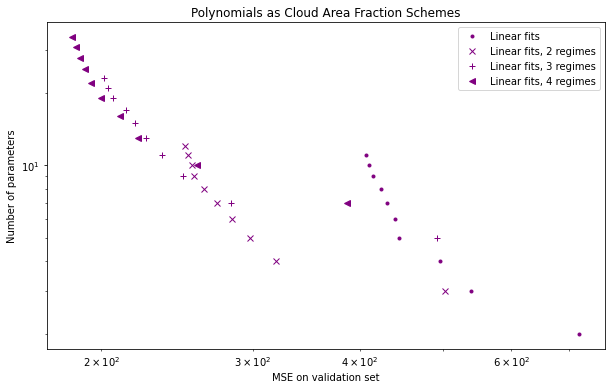

In [61]:
fig = plt.figure(figsize=(10,6))

# ## First plot
# ax = fig.add_subplot(121, title='cl_vol', xlabel='MSE on validation set', ylabel='Number of parameters')

# # # Plot line of constant AIC
# # handleAIC, = ax.plot(np.linspace(mse_min, mse_max, 1000), (aic - N*np.log(np.linspace(mse_min, mse_max, 1000)))/2, color='green', \
# #                    label='AIC = %d'%aic)

# # Plot Pareto frontier
# handlePAR, = ax.plot(pareto_mse_cl_vol, pareto_par_cl_vol, color='green', label='Pareto frontier')

# for key in no_parameters_cl_vol.keys():
#     if 'NN' in key and 'seq' not in key:
#         handleA, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='blue', label='NNs')
#     elif 'NN' in key and 'seq' in key:
#         try:
#             handleE, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='cyan', label='SFS NNs')
#         except:
#             pass
#     elif 'lin' in key:
#         handleB, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='purple', label='SFS Linear fits')
#     elif 'pol' in key:
#         handleC, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='red', label='SFS Polynomials')
#     elif 'sq' in key:
#         handleD, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='orange', label='Sundqvist')
#     elif 'wang' in key:
#         handleF, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='green', label='Wang')
#     elif 'teixeira' in key:
#         handleG, = ax.plot(mse_scores_cl_vol[key], no_parameters_cl_vol[key], '.', color='magenta', label='Teixeira')
        
# # ax.legend(handles=[handleA, handleB, handleC, handleD])
# ax.legend(handles=[handlePAR, handleA, handleE, handleB, handleC, handleD, handleF, handleG])
# ax.set_xscale('log')
# ax.set_yscale('log')

# # R2 = 0.9
# ax.axvline(x = 188.57, linewidth = 0.5, linestyle='--')

## Second plot
# ax_2 = fig.add_subplot(122, title='cl_area', xlabel='MSE on validation set')
ax_2 = fig.add_subplot(111, title='Polynomials as Cloud Area Fraction Schemes', xlabel='MSE on validation set', ylabel='Number of parameters')

# # Plot Pareto frontier
# handlePAR, = ax_2.plot(pareto_mse_cl_area, pareto_par_cl_area, color='green', label='Pareto frontier')
    
for key in no_parameters_cl_area.keys():
    if 'lin' in key and int(key.split('_')[-1]) < 11:
        handleB, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='purple', label='SFS Linear fits')
    elif 'deg_1' in key and 'no_reg_2' in key:
        handleH, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='purple', label='SFS Linear fits, 2 regimes')
    elif 'deg_1' in key and 'no_reg_3' in key :
        handleI, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='purple', label='SFS Linear fits, 3 regimes')
    elif 'deg_1' in key and 'no_reg_4' in key:
        handleL, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '<', color='purple', label='SFS Linear fits, 4 regimes')
    # if 'deg_2' in key and 'pol' in key:
    #     handleC, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='red', label='Deg 2, no regimes')
    # elif 'deg_2' in key and 'no_reg_2' in key:
    #     handleJ, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='red', label='Deg 2, 2 regimes')
    # elif 'deg_2' in key and 'no_reg_3' in key:
    #     handleK, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='red', label='Deg 2, 3 regimes')
    # elif 'deg_2' in key and 'no_reg_4' in key:
    #     handleA, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '<', color='red', label='Deg 2, 4 regimes')
    # if 'deg_3' in key and 'pol' in key:
    #     handleM, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '.', color='green', label='Deg 3, no regimes')
    # elif 'deg_3' in key and 'no_reg_2' in key:
    #     handleN, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], 'x', color='green', label='Deg 3, 2 regimes')
    # elif 'deg_3' in key and 'no_reg_3' in key:
    #     handleO, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '+', color='green', label='Deg 3, 3 regimes')
    # elif 'deg_3' in key and 'no_reg_4' in key:
    #     handleP, = ax_2.plot(mse_scores_cl_area[key], no_parameters_cl_area[key], '<', color='green', label='Deg 3, 4 regimes')

ax_2.set_xscale('log')
ax_2.set_yscale('log')
ax_2.legend(handles=[handleB, handleH, handleI, handleL])
# ax_2.legend(handles=[handleC, handleJ, handleK, handleA, handleM, handleN, handleO, handleP])

# # R2 = 0.9 = 0.1*np.var(output_data)
# ax_2.axvline(x = 0.1*output_var, linewidth = 0.5, linestyle='--')
# # R2 = 0.99 = 0.01*np.var(output_data)
# ax_2.axvline(x = 0.05*output_var, linewidth = 0.5, linestyle='--')
# # # R2 = 0.99 = 0.01*np.var(output_data)
# # ax_2.axvline(x = 0.01*output_var, linewidth = 0.5, linestyle='--')
# plt.text(103, 1.5, r'$R^2 > 0.9$', color='blue')
# plt.text(40, 1.5, r'$R^2 > 0.95$', color='blue')

# plt.savefig('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/combined_results/dyamond_data/performance_vs_complexity_logscale_regimes_2.pdf')

### Plot only the seq feat sel NNs

Want to pick the NN for which the MSE does not decrease by 1 any longer (for an additional feature)

--> Pick the model with 9 features for cl_vol <br>
--> Pick the model with 10 features for cl_area

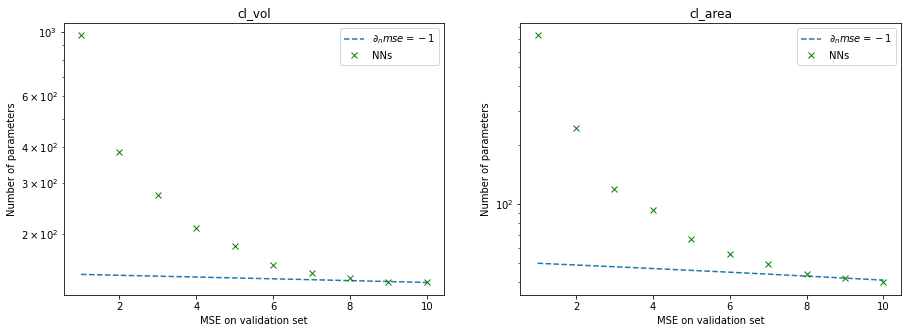

In [255]:
fig = plt.figure(figsize=(15,5))

## First plot
ax = fig.add_subplot(121, title='cl_vol', xlabel='MSE on validation set', ylabel='Number of parameters')

# Goes through the eigth point
a = np.linspace(1, 10, 200)
b = mse_scores_cl_vol['seq_feat_sel_NN_%d'%9] + (9-a)
ax.plot(a,b,'--')

for no_features in range(1, 11):
    plt.plot(no_features, mse_scores_cl_vol['seq_feat_sel_NN_%d'%no_features], 'gx')

ax.legend(['$\partial_{n}mse = -1$', 'NNs'])
ax.set_yscale('log')

## Second plot
ax_2 = fig.add_subplot(122, title='cl_area', xlabel='MSE on validation set', ylabel='Number of parameters')

a = np.linspace(1, 10, 200)
b = mse_scores_cl_area['seq_feat_sel_NN_%d'%9] + (9-a)
plt.plot(a,b,'--')

for no_features in range(1, 11):
    plt.plot(no_features, mse_scores_cl_area['seq_feat_sel_NN_%d'%no_features], 'gx')
    
ax_2.legend(['$\partial_{n}mse = -1$', 'NNs'])
ax_2.set_yscale('log')

plt.savefig('/home/b/b309170/workspace_icon-ml/symbolic_regression/baselines/combined_results/\
dyamond_data/seq_feat_sel_nns_mse.pdf', bbox_inches='tight')

In [168]:
mse_scores_cl_vol['seq_feat_sel_NN_%d'%9]

136.5946

In [169]:
mse_scores_cl_vol['seq_feat_sel_NN_%d'%10]

136.4719